# Prepare data and define analysis 

### Load libraries

In [1]:
! pip install -r ../requirements.txt

import pandas as pd
import numpy as np
import numpy_financial as npf
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import colormaps
from itables import init_notebook_mode, show
import sys
import os
import kaleido #required
import matplotlib.pyplot as plt 
from operator import itemgetter

sys.path.append(os.path.abspath("../src")) 
from utils import *  #Functions in utils.py



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Define case-related constants and colour palette

In [2]:

palette_techs= sns.color_palette('deep').as_hex()

CONSTANTS = {
    "kWh_l_Diesel": 9.96,  # kWh per liter of Diesel
    "kWh_kg_NG": 13.1,  # kWh per kg of Natural Gas
    "kWh_kg_H2": 33.3,  # kWh per kg of Hydrogen
    "Years_int": [2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035],  # List of years to interpolate when data is missing
    "Technologies_base": ["Diesel", "NG", "BET", "FCET"],  # Base technologies
    "Components": ["CAPEX", "FIXOM", "VAROM", "Energy", "ETS", "Re-Infr"], #TCO Components
    "hours_year_electrolyzer": 4000, #Hours of operation of the electrolyzer
    "DR":0.1, #Discount Rate
    "palette":sns.color_palette('Pastel1',20), #palette of colors 
    "RValue": 0.3, #Residual value of the vehicle after the use of the first owner
    "Indirect_cost" : 1.36, #Indirect cost in the vehicle purchase price compared to the production cost
    "nper": 5, #Number of years for the vehicle loan
    "leverage": 1, #Leverage ratio
    "Rate": 0.04, 
    "Life" : 5, #Life of the vehicle in the first owner's hands 
    "Years": np.arange(2024, 2041, 1, dtype=int), #Years of study
    "Insurance_rate": 0.08, #Insurance cost as a % of the CAPEX of the vehicle 
    "Road_tolls": 16, #EUR/100km
    "working_days": 260, #Days/year
    "ETS_year": 2027, #Year when ETS starts
    "Depot_price":47, #BET recharging price at depot (Re-Infr cost €/MWh)
    "MW_Price":100, #BET recharging price at public infr (Re-Infr cost €/MWh)
    "color_diesel":palette_techs[0],
    "color_LNG":palette_techs[3],
    "color_bioLNG":palette_techs[1],
    "color_BET":palette_techs[2],
    "color_FCEV":palette_techs[8],
    "color_HVO":palette_techs[9]   
}



### Load Data from .csv files (to be modified in Excel)

In [3]:

data = load_data(CONSTANTS)  
Chassis_Price, Components_Price, Efficiencies, CAPEX_Vehicles, Powertrain_Features, Maintenance_curve, Maintenance_Price, Em_Factors, ETS_Price, Comp_Features, Cost_Red_H2, VECTO, FuelPrices, Electrolyzer_IEA, hydrogen_price_data = data.values()

# Goods transport in Europe - Analysis of operations and vehicles

### Analyze vehicle registration data (EEA Monitoring)

In [4]:
#To analyze vehicle data, one must download the file (too large for Github) from the following link: https://data.europa.eu/data/datasets/transport/vehicles/vehicles-1
#This is the complete data folder for this model, which includes the vehicle data and should substitute the data folder in your repository

#EEA, subgroup_percentages, distance_data= analyze_vehicle_data()
#analyze_etis_data()

### Analyze operations per distance (ETIS vs. Eurostat)

In [5]:
#To analyze operations data, follow instructions above

#ETIS_result_table, ETIS_summarized_table= analyze_etis_data()

# Energy price

In [6]:
data["FuelPrices"]

,Fuel,Scenario,Year,Energy,Energy_Taxes,Distribution,Final_price
0,Oil,High,2024.0,0.0504,0.0387,0.015,0.1041
1,Oil,High,2025.0,0.0501,0.0387,0.015,0.1038
2,Oil,High,2026.0,0.0497,0.0387,0.015,0.1034
3,Oil,High,2027.0,0.0494,0.0387,0.015,0.1031
4,Oil,High,2028.0,0.0491,0.0387,0.015,0.1028
...,...,...,...,...,...,...,...
477,H2,Low,2046.0,0.1252,0.0005,0.000,0.1258
478,H2,Low,2047.0,0.1249,0.0005,0.000,0.1255
479,H2,Low,2048.0,0.1243,0.0005,0.000,0.1249
480,H2,Low,2049.0,0.1240,0.0005,0.000,0.1246


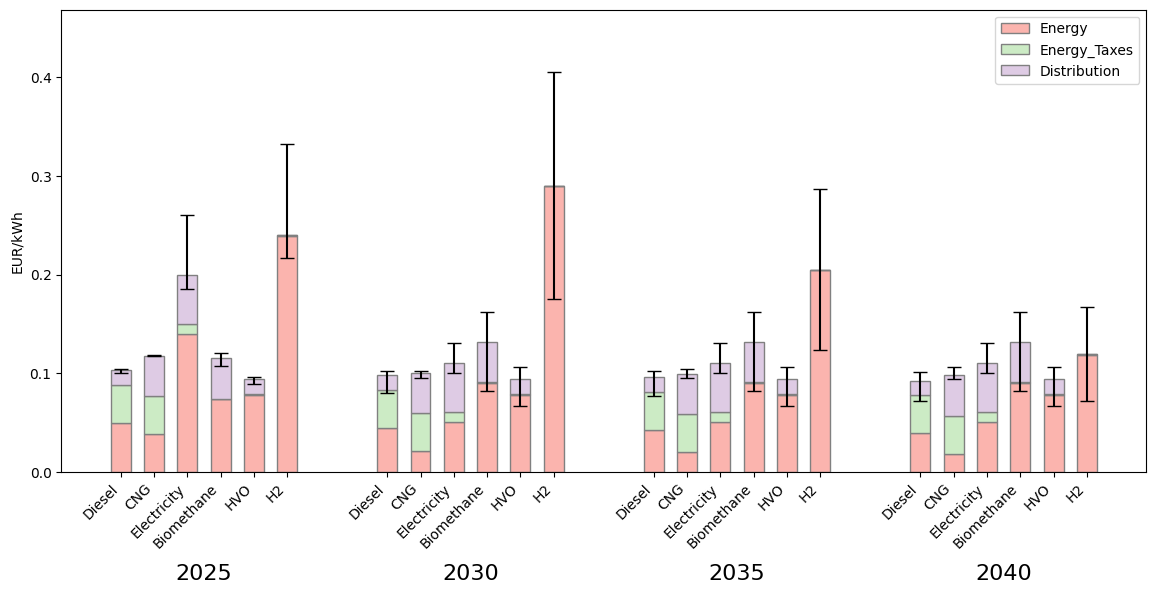

<Axes: ylabel='EUR/kWh'>

In [7]:
#To modify energy prices please do so in the .csv or Excel files 

plot_fuel_price_components(CONSTANTS, [2025, 2030, 2035, 2040], data)

# Define Fleet (Cases of study)


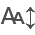

In [8]:
init_notebook_mode(all_interactive=True)

Cases = pd.DataFrame({
    'Case': ['Urban Delivery', 'Regional', 'Long Haul - Depot', 'Long Haul - Long Distance'],
    'VECTO_Group': ['3', '4-RD', '5-LH', '5-LH'],
    'Distance': [250, 400, 500, 1000],
    'Depot': [0.8,0.8,0.8,0.2],
    'Public': [0.2,0.2,0.2,0.8]
})
show(Cases)

# RESULTS

### CAPEX

C:\Users\mperezb\AppData\Local\Temp\ipykernel_27820\752240144.py:21: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [plt.Rectangle((0, 0), 1, 1, color=FCEV_colors[i], hatch=FCEV_hatch, edgecolor=hatch_color) for i in range(len(legend_labels) - 4)]


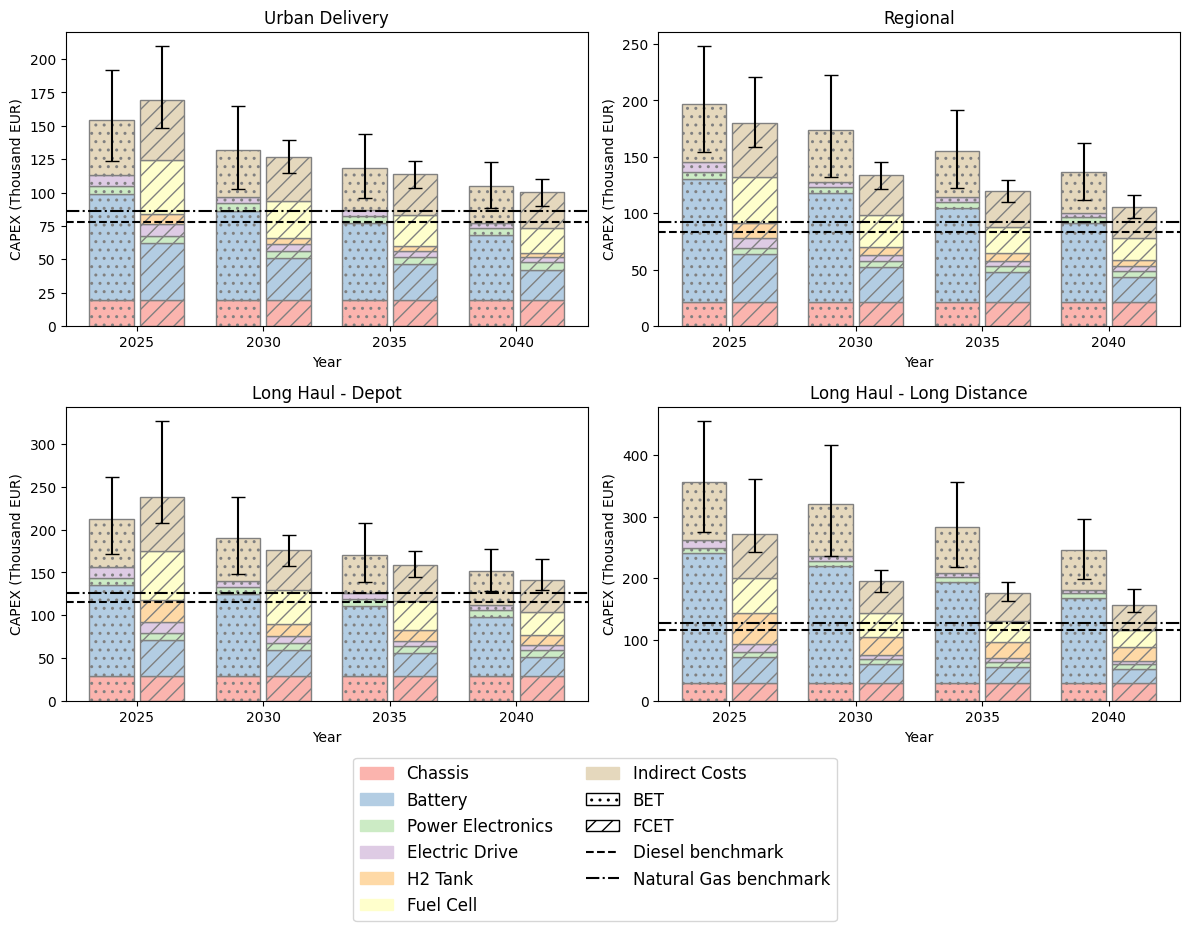

In [9]:
# Please define the years and technologies to be assessed in the CAPEX evolution plot

BET_colors = CONSTANTS["palette"][0:4] + [CONSTANTS["palette"][6]]
FCEV_colors = CONSTANTS["palette"][0:7]
BET_hatch = '..'
FCEV_hatch = '//'
hatch_color = 'grey'
years = [2025, 2030, 2035, 2040]
VECTO_Group = '5-LH'
central_scenario = 'All'

fig, axs = plt.subplots(2, 2, figsize=(12, 8.5))

for c in Cases.iterrows():
    i = c[0]
    ax = axs[i // 2, i % 2]
    plot_CAPEX_composition_by_component(years, c, central_scenario, data, CONSTANTS, ax)

# Create a single legend at the bottom
legend_labels = ['Chassis', 'Battery', 'Power Electronics', 'Electric Drive', 'H2 Tank', 'Fuel Cell', 'Indirect Costs', 'BET', 'FCET', 'Diesel benchmark', 'Natural Gas benchmark']
handles = [plt.Rectangle((0, 0), 1, 1, color=FCEV_colors[i], hatch=FCEV_hatch, edgecolor=hatch_color) for i in range(len(legend_labels) - 4)]
handles += [plt.Rectangle((0, 0), 1, 1, hatch=BET_hatch, edgecolor='black', facecolor='white'),
            plt.Rectangle((0, 0), 1, 1, hatch=FCEV_hatch, edgecolor='black', facecolor='white'),
            plt.Line2D([], [], color="black", linestyle='--'),
            plt.Line2D([], [], color="black", linestyle='-.')]

fig.legend(handles, legend_labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), fontsize='large', fancybox=True, ncol=2)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig('CAPEX_Evolution.svg', format='svg', bbox_inches='tight')

plt.show()

### TCO (Waterfall charts for a given year)

In [10]:
#Please set the year of analysis
Year=[2030]
Total_Matrix=Total_Matrix_km(Cases,data,CONSTANTS)
for c in Cases.iterrows():
    for y in Year:
        print(c[1]["Case"], y)
        results=Create_Waterfall(Cases,c, y, Total_Matrix, data, CONSTANTS)
        fig = results[0]
        fig.show()
        fig.write_image(os.path.join(results_folder, "TCO_{}_{}_2.svg".format(c[1]["Case"], y)), engine="kaleido")


Urban Delivery 2030


Regional 2030


Long Haul - Depot 2030


Long Haul - Long Distance 2030


### TCO Evolution over time 

c:\Users\mperezb\OneDrive - Universidad Pontificia Comillas\Papers\Tte-pesado\Anlisis_HDV_EEA\Codigo_Git\src\utils.py:1583: UserWarning:

linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.



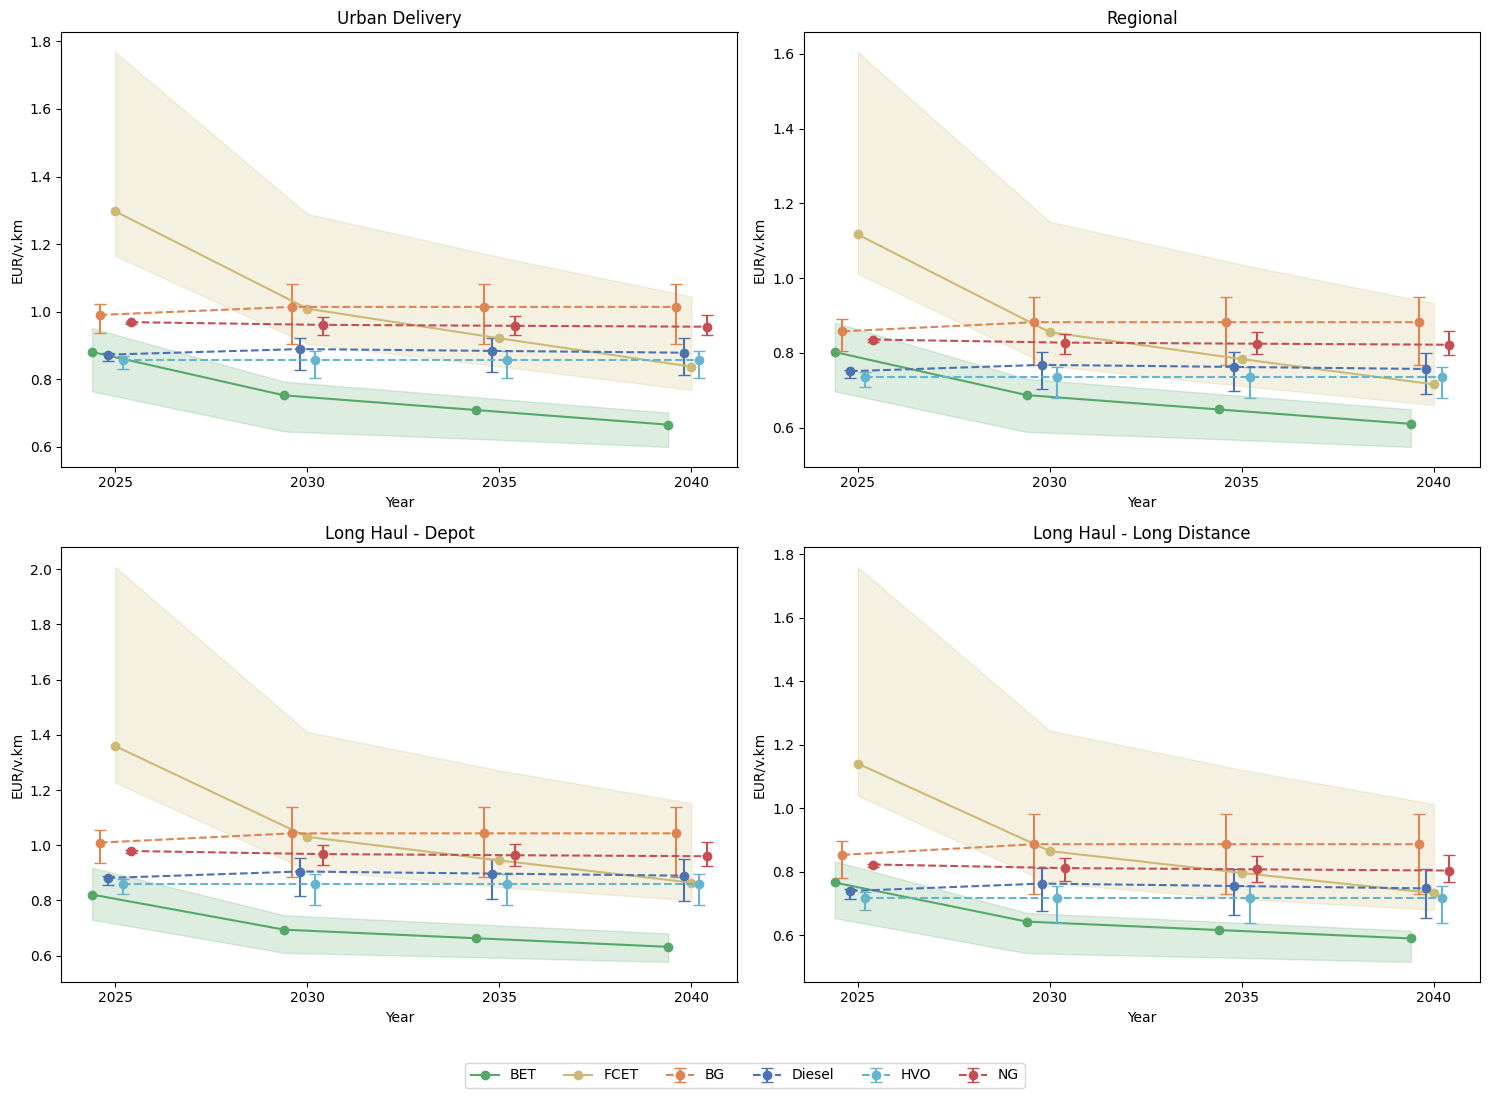

In [11]:
plot_tco_evolution(Total_Matrix)

### TCO Sensitivity to Fleet Size 

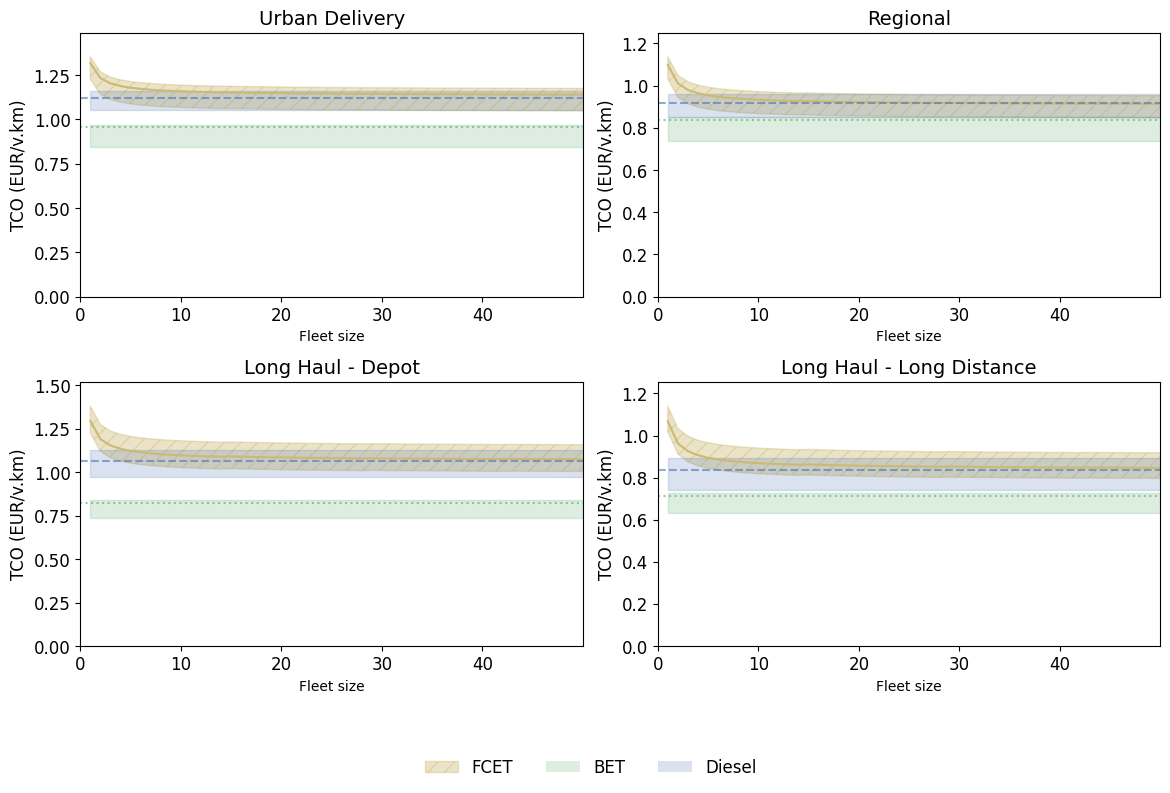

In [12]:
#Please set the year of analysis
y=2040
plot_tco_fleet_sensitivity(Total_Matrix, y, CONSTANTS)